In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np 
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [26]:
df= pd.read_excel("data\Concrete_Data.xls")

In [27]:
df.columns = ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']

In [28]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [29]:
## Independent and dependent(target) feature
X=df.drop(labels=['Concrete compressive strength'],axis=1)
Y=df[['Concrete compressive strength']]

In [30]:
cols = ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

In [31]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,cols)
])

In [47]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=123)

In [49]:
## adjusted r2-score 
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1)) / (len(y_true) - n_features - 1)
    return adj_r2


In [50]:
import numpy as np
def evaluate_model(true, predicted,n_features):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    adj_r2_square=adj_r2_score(true,predicted,n_features)
    return mae, rmse, r2_square,adj_r2_square

In [51]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Decesion_tree_regressor':DecisionTreeRegressor(),
    'Random_forest_regressor':RandomForestRegressor()
    
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square,adj_r2_square=evaluate_model(y_test,y_pred,X_train.shape[1])

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print(r2_list.append(r2_square))

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("Ajusted R2 score",adj_r2_square*100)
    
    print('='*35)
    print('\n')

LinearRegression
None
Model Training Performance
RMSE: 10.259034004647104
MAE: 8.15834931929349
R2 score 60.11075461008235
Ajusted R2 score 59.04704139968455


Lasso
None
Model Training Performance
RMSE: 10.22228482121118
MAE: 8.137676820967105
R2 score 60.39601961239116
Ajusted R2 score 59.33991346872158


Ridge
None
Model Training Performance
RMSE: 10.25900575493923
MAE: 8.15833365897377
R2 score 60.11097429119025
Ajusted R2 score 59.047266938955325


Elasticnet
None
Model Training Performance
RMSE: 10.231730029657813
MAE: 8.143081796101686
R2 score 60.32279906089486
Ajusted R2 score 59.26474036918539


Decesion_tree_regressor
None
Model Training Performance
RMSE: 6.784945637784389
MAE: 4.396501250035866
R2 score 82.5524027927778
Ajusted R2 score 82.08713353391855




C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_16812\4101986559.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random_forest_regressor
None
Model Training Performance
RMSE: 5.28009126822824
MAE: 3.560402489827384
R2 score 89.43363178195202
Ajusted R2 score 89.15186196280406




In [52]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'Decesion_tree_regressor',
 'Random_forest_regressor']

In [53]:
r2_list

[0.6011075461008235,
 0.6039601961239116,
 0.6011097429119026,
 0.6032279906089486,
 0.825524027927778,
 0.8943363178195202]

In [55]:
data = {'model_list':['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Decesion_tree_regressor', 'Random_forest_regressor'],
       'r2_list':[0.6011075461008235, 0.6039601961239116, 0.6011097429119026, 0.6032279906089486, 0.825524027927778, 0.8943363178195202]}
data = pd.DataFrame(data)
data

,model_list,r2_list
0,LinearRegression,0.601108
1,Lasso,0.603960
2,Ridge,0.601110
3,Elasticnet,0.603228
4,Decesion_tree_regressor,0.825524
5,Random_forest_regressor,0.894336


In [56]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='r2_list', ylabel='model_list'>

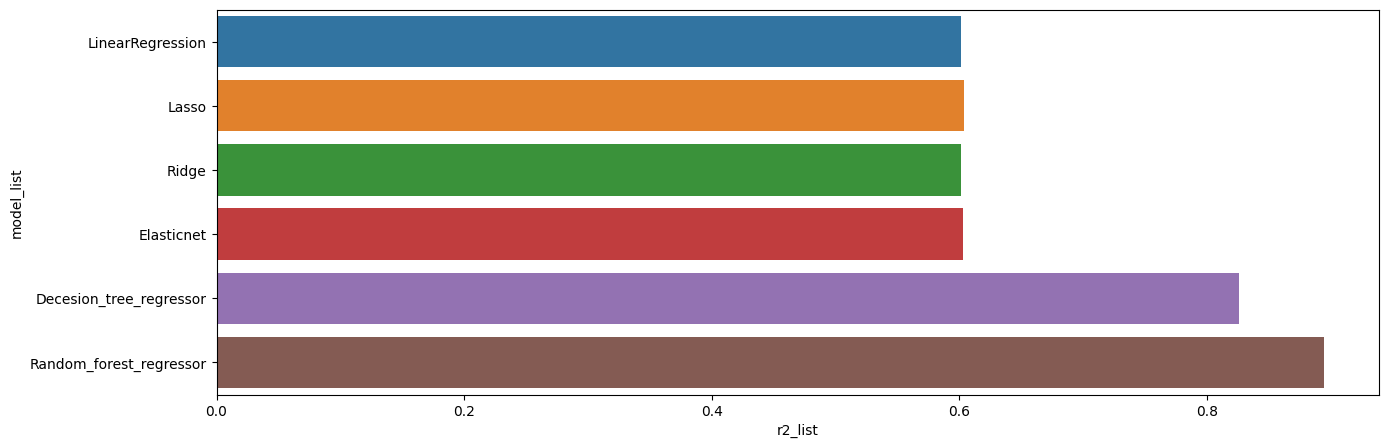

In [58]:
plt.figure(figsize=(15, 5))
sns.barplot(data=data,y='model_list',x='r2_list')